# Working Outline
[1. Importing DF here!](#1.-Importing-DF-here!)

[2. CHANGING COLUMN NAMES HERE](#2.-CHANGING-COLUMN-NAMES-HERE)

[3. Cleaning up columns here!](#3.-Cleaning-up-columns-here!)

[4. Dealing With Null Values HERE!](#4.-Dealing-With-Null-Values-HERE!)

[5. Various dealing with datatypes](#5.-Various-dealing-with-datatypes)

[6. Converting datetimes here!](#6.-Converting-datetimes-here!)

[7. Make month into a datetime object!](#7.-Make-month-into-a-datetime-object!)

[8. All about victim ages!](#8.-All-about-victim-ages!)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
# Importing preferences/ looks for stuff here
pd.set_option('display.max_columns', 999)
pd.options.display.max_rows = 4000


In [3]:
os.getcwd()

'C:\\Users\\gothv\\Jupyter\\final_capstone'

In [4]:
os.chdir('C:\\Users\\gothv\\Desktop\\final capstone')

In [5]:
os.getcwd()

'C:\\Users\\gothv\\Desktop\\final capstone'

# 1. Importing DF here!
[Back to working outline](#Working-Outline)


In [121]:
df= pd.read_csv('Police_Incidents.csv', dtype = 'unicode')

In [7]:
df.head()

,Incident Number w/year,Year of Incident,Service Number ID,Watch,Call (911) Problem,Type of Incident,Type Location,Type of Property,Incident Address,Apartment Number,Reporting Area,Beat,Division,Sector,Council District,Target Area Action Grids,Community,Date1 of Occurrence,Year1 of Occurrence,Month1 of Occurence,Day1 of the Week,Time1 of Occurrence,Day1 of the Year,Date2 of Occurrence,Year2 of Occurrence,Month2 of Occurence,Day2 of the Week,Time2 of Occurrence,Day2 of the Year,Date of Report,Date incident created,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Offense Entered Date/Time,CFS Number,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time,Special Report (Pre-RMS),Person Involvement Type,Victim Type,Victim Name,Victim Race,Victim Ethnicity,Victim Gender,Victim Age,Victim Age at Offense,Victim Home Address,Victim Apartment,Victim Zip Code,Victim City,Victim State,Victim Business Name,Victim Business Address,Victim Business Phone,Responding Officer #1 Badge No,Responding Officer #1 Name,Responding Officer #2 Badge No,Responding Officer #2 Name,Reporting Officer Badge No,Assisting Officer Badge No,Reviewing Officer Badge No,Element Number Assigned,Investigating Unit 1,Investigating Unit 2,Offense Status,UCR Disposition,Victim Injury Description,Victim Condition,Modus Operandi (MO),Family Offense,Hate Crime,Hate Crime Description,Weapon Used,Gang Related Offense,Victim Package,Drug Related Istevencident,RMS Code,Criminal Justice Information Service Code,Penal Code,UCR Offense Name,UCR Offense Description,UCR Code,Offense Type,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,Update Date,X Coordinate,Y Cordinate,Zip Code,City,State,Location1
0,159977-2018,2018,159977-2018-01,3,12R - RESIDENTIAL ALARM,ALARM INCIDENT REPORT (NO OFFENSE),NaN,NaN,9110 ROCKBROOK DR,NaN,3052,524,NORTHWEST,520,D13,NaN,NaN,07/21/2018,2018,July,Sat,19:45,202,07/21/2018,2018,July,Sat,19:57,202,07/21/2018 08:30:00 PM,07/21/2018 08:28:39 PM,2018,July,Sat,20:28,202,18-1322612,07/21/2018 07:57:21 PM,07/21/2018 07:57:19 PM,07/21/2018 08:36:34 PM,07/21/2018 08:16:35 PM,NaN,Victim,Society/Public,CITY OF DALLAS,NaN,NaN,NaN,NaN,NaN,9801 HARRY HINES BLVD,NaN,75220,DALLAS,TX,NaN,NaN,NaN,10768,"KERR,RV",10769,"HARMON,CHAD",10768,NaN,118185,C553,NaN,NaN,Suspended,Suspended,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA-99999999-MSC4,99999999,Alarm- No Offense,NaN,NaN,NaN,NaN,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,D,Not Coded,2018-07-26 05:42:40.0000000,2480409.34893,7001587.06409,75220,DALLAS,TX,"9110 ROCKBROOK DR\nDALLAS, TX 75220\n(32.86501..."
1,063412-2019,2019,063412-2019-01,2,6XA - MAJOR DIST AMBULANCE,ASSAULT -OFFENSIVE CONTACT,NaN,NaN,5631 SPRING VALLEY RD,175,1009,632,NORTH CENTRAL,630,D11,SpringValley Preston,NaN,03/31/2019,2019,March,Sun,08:45,90,03/31/2019,2019,March,Sun,08:47,90,03/31/2019 03:35:00 PM,03/31/2019 08:52:31 AM,2019,March,Sun,08:52,90,19-0560418,03/31/2019 08:31:43 AM,03/31/2019 08:31:42 AM,03/31/2019 09:31:19 AM,03/31/2019 08:33:37 AM,NaN,Victim,Individual,"SMITH, DERIC, SWAIN",White,Non-Hispanic or Latino,Male,37,36,5631 SPRING VALLEY RD,275,75254,DALLAS,TX,NaN,NaN,NaN,9442,"ALLISON,TROY,LEE",NaN,NaN,9442,9163,106845,B625,Investigations,Capers / Assaults,Suspended,Suspended,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MC-99999999-H29,99999999,PC 22.01(a)(3),NaN,NaN,NaN,NaN,SIMPLE ASSAULT,ASSAULT OFFENSES,PERSON,13B,A,Coded,2019-04-21 16:30:56.0000000,2486843.65365,7028765.38112,75254,DALLAS,TX,"5631 SPRING VALLEY RD\nDALLAS, TX 75254\n(32.9..."
2,012761-2019,2019,012761-2019-01,2,40/01 - OTHER,UNEXPLAINED DEATH (NO OFFENSE),NaN,NaN,3601 CARL ST,NaN,2117,311,SOUTHEAST,310,D7,NaN,NaN,01/19/2019,2019,January,Sat,08:00,19,01/19/2019,2019,January,Sat,12:49,19,01/19/2019 01:00:00 PM,01/19/2019 01:23:45 PM,2019,January,Sat,13:23,19,19-0112505,01/19/2019 12:48:56 PM,01/19/2019 12:48:56 PM,01/19/2019 03:38:30 PM,01/19/2019 12:53:

In [8]:
df.columns

Index(['Incident Number w/year', 'Year of Incident', 'Service Number ID',
       'Watch', 'Call (911) Problem', 'Type of Incident', 'Type  Location',
       'Type of Property', 'Incident Address', 'Apartment Number',
       'Reporting Area', 'Beat', 'Division', 'Sector', 'Council District',
       'Target Area Action Grids', 'Community', 'Date1 of Occurrence',
       'Year1 of Occurrence', 'Month1 of Occurence', 'Day1 of the Week',
       'Time1 of Occurrence', 'Day1 of the Year', 'Date2 of Occurrence ',
       'Year2 of Occurrence', 'Month2 of Occurence', 'Day2 of the Week',
       'Time2 of Occurrence', 'Day2 of the Year', 'Date of Report',
       'Date incident created', 'Offense Entered Year',
       'Offense Entered Month', 'Offense Entered Day of the Week',
       'Offense Entered Time', 'Offense Entered  Date/Time', 'CFS Number',
       'Call Received Date Time', 'Call Date Time', 'Call Cleared Date Time',
       'Call Dispatch Date Time', 'Special Report (Pre-RMS)',
       'Per

In [9]:
df.describe()

,Incident Number w/year,Year of Incident,Service Number ID,Watch,Call (911) Problem,Type of Incident,Type Location,Type of Property,Incident Address,Apartment Number,Reporting Area,Beat,Division,Sector,Council District,Target Area Action Grids,Community,Date1 of Occurrence,Year1 of Occurrence,Month1 of Occurence,Day1 of the Week,Time1 of Occurrence,Day1 of the Year,Date2 of Occurrence,Year2 of Occurrence,Month2 of Occurence,Day2 of the Week,Time2 of Occurrence,Day2 of the Year,Date of Report,Date incident created,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Offense Entered Date/Time,CFS Number,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time,Special Report (Pre-RMS),Person Involvement Type,Victim Type,Victim Name,Victim Race,Victim Ethnicity,Victim Gender,Victim Age,Victim Age at Offense,Victim Home Address,Victim Apartment,Victim Zip Code,Victim City,Victim State,Victim Business Name,Victim Business Address,Victim Business Phone,Responding Officer #1 Badge No,Responding Officer #1 Name,Responding Officer #2 Badge No,Responding Officer #2 Name,Reporting Officer Badge No,Assisting Officer Badge No,Reviewing Officer Badge No,Element Number Assigned,Investigating Unit 1,Investigating Unit 2,Offense Status,UCR Disposition,Victim Injury Description,Victim Condition,Modus Operandi (MO),Family Offense,Hate Crime,Hate Crime Description,Weapon Used,Gang Related Offense,Victim Package,Drug Related Istevencident,RMS Code,Criminal Justice Information Service Code,Penal Code,UCR Offense Name,UCR Offense Description,UCR Code,Offense Type,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,Update Date,X Coordinate,Y Cordinate,Zip Code,City,State,Location1
count,600107,600107,600107,600107,596298,600107,599300,141884,596610,121146,599478,599794,599794,599801,597672,200656,65240,600101,600101,600101,600101,600101,600101,600101,600101,600101,600101,600101,600101,600107,600107,600107,600107,600107,600107,600107,596299,596299,596299,595935,596242,3250,578676,570424,575171,362631,365752,362809,344126,337792,563143,155069,555812,562463,557637,24364,16277,8320,595297,594475,227051,227050,596745,432184,597906,595723,422020,422045,589248,589317,29983,22701,573774,597398,690,599245,390541,394658,0.0,597342,600107,600107,600107,409170,409170,409170,409170,341022,341022,341022,341022,341022,341022,600107,596316,596316,596335,594742,594452,596610
unique,553985,12,600107,3,126,972,77,25,154902,8728,1151,234,14,36,19,31,32,2378,31,12,7,1440,366,2184,20,12,7,1440,366,460061,516906,6,12,7,1440,366,527478,526627,526590,525985,526561,13,8,9,330528,9,3,5,117,98,227799,9433,7055,5510,77,10844,9068,6115,3947,3897,3918,3904,3970,2386,167,3970,4,54,8,12,20611,5,359204,1,2,24,36,5,0.0,6,1055,534,485,49,37,67,3,48,30,6,44,4,3,537044,203007,202877,126,82,26,159751
top,216100-2017,2018,258720-2015-01,1,58 - ROUTINE INVESTIGATION,BMV,"Highway, Street, Alley ETC",Motor Vehicle,1400 S LAMAR ST,100,1217,153,NORTHEAST,150,D2,WebbChapel Timberline,Northwest_PFA,09/01/2018,2018,July,Fri,00:00,213,07/13/2018,2018,July,Mon,08:00,194,09/21/2017 03:38:00 AM,09/21/2017 02:26:02 AM,2018,July,Mon,16:55,194,17-1798291,09/21/2017 02:25:13 AM,09/21/2017 02:25:13 AM,09/21/2017 08:47:02 PM,09/21/2017 02:25:14 AM,State Fair (Inside Fair),Victim,Individual,CITY OF DALLAS,Black,Non-Hispanic or Latino,Male,26,26,725 N JIM MILLER RD,101,75217,DALLAS,TX,SELF,9915 E NORTHWEST HWY,2146704415,94392,"WILLIS,LINDA,M",6700,"FRANCIS JR,GEORGE",94392,5799,81075,EX07,Investigations,Special Investigations / Auto Theft,Suspended,Suspended,DECEASED,Good,FOUND PROPERTY,false,No,None,Other,No,NaN,No,MA-22990004-F1,99999999,PC 30.04(a),THEFT/BMV,THEFT,1400,PART1,MISCELLANEOUS,MISCELLANEOUS,PROPERTY,999,A,Coded,2017-09-21 18:11:03.0000000,2497879.95441,6971387.76359,75217,DALLAS,TX,"1400 S LAMAR ST\nDALLAS, TX 75215\n(32.767362,..."
freq,139,133899,1,240837,71886,64468,114339,27790,2672,14

In [10]:
df.dtypes

Incident Number w/year                       object
Year of Incident                             object
Service Number ID                            object
Watch                                        object
Call (911) Problem                           object
Type of Incident                             object
Type  Location                               object
Type of Property                             object
Incident Address                             object
Apartment Number                             object
Reporting Area                               object
Beat                                         object
Division                                     object
Sector                                       object
Council District                             object
Target Area Action Grids                     object
Community                                    object
Date1 of Occurrence                          object
Year1 of Occurrence                          object
Month1 of Oc

## 2. CHANGING COLUMN NAMES HERE
[Back to working outline](#Working-Outline)

In [122]:
# Making column names easier to manage/consistant
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [123]:
df.columns

Index(['incident_number_w/year', 'year_of_incident', 'service_number_id',
       'watch', 'call_(911)_problem', 'type_of_incident', 'type__location',
       'type_of_property', 'incident_address', 'apartment_number',
       'reporting_area', 'beat', 'division', 'sector', 'council_district',
       'target_area_action_grids', 'community', 'date1_of_occurrence',
       'year1_of_occurrence', 'month1_of_occurence', 'day1_of_the_week',
       'time1_of_occurrence', 'day1_of_the_year', 'date2_of_occurrence_',
       'year2_of_occurrence', 'month2_of_occurence', 'day2_of_the_week',
       'time2_of_occurrence', 'day2_of_the_year', 'date_of_report',
       'date_incident_created', 'offense_entered_year',
       'offense_entered_month', 'offense_entered_day_of_the_week',
       'offense_entered_time', 'offense_entered__date/time', 'cfs_number',
       'call_received_date_time', 'call_date_time', 'call_cleared_date_time',
       'call_dispatch_date_time', 'special_report_(pre-rms)',
       'per

In [13]:
df.dtypes

incident_number_w/year                       object
year_of_incident                             object
service_number_id                            object
watch                                        object
call_(911)_problem                           object
type_of_incident                             object
type__location                               object
type_of_property                             object
incident_address                             object
apartment_number                             object
reporting_area                               object
beat                                         object
division                                     object
sector                                       object
council_district                             object
target_area_action_grids                     object
community                                    object
date1_of_occurrence                          object
year1_of_occurrence                          object
month1_of_oc

In [124]:
# Getting rid of columns we don't need right away!
df.drop(['incident_number_w/year', 'year_of_incident', 'service_number_id','watch', 'type__location','type_of_property',
         'apartment_number', 'reporting_area', 'beat','target_area_action_grids', 'community', 'date2_of_occurrence_', 
         'year2_of_occurrence', 'month2_of_occurence', 'day2_of_the_week','time2_of_occurrence', 'day2_of_the_year',
         'date_of_report','date_incident_created', 'offense_entered_year','offense_entered_month', 'offense_entered_day_of_the_week',
         'offense_entered_time', 'offense_entered__date/time', 'cfs_number','call_received_date_time', 'call_date_time',
         'call_cleared_date_time','call_dispatch_date_time', 'special_report_(pre-rms)','person_involvement_type', 
         'victim_name', 'victim_age_at_offense', 'victim_home_address', 'victim_apartment','victim_zip_code', 'victim_city',
         'victim_state', 'victim_business_name', 'victim_business_address', 'victim_business_phone', 'reporting_officer_badge_no',
         'assisting_officer_badge_no', 'reviewing_officer_badge_no','element_number_assigned', 'investigating_unit_1','investigating_unit_2',
         'offense_status', 'ucr_disposition','victim_injury_description', 'victim_condition', 'modus_operandi_(mo)','family_offense',
         'hate_crime', 'hate_crime_description', 'weapon_used','gang_related_offense', 'victim_package', 'drug_related_istevencident',
         'rms_code', 'criminal_justice_information_service_code', 'penal_code','ucr_offense_name', 'ucr_offense_description',
         '_ucr_code','offense_type', 'nibrs_crime', 'nibrs_crime_against', 'nibrs_code', 'nibrs_group', 'nibrs_type','update_date', 
         'city','state', 'location1'], axis = 1, inplace = True)

In [125]:
# Sanity check that our non-needed columns dropped
df.columns

Index(['call_(911)_problem', 'type_of_incident', 'incident_address',
       'division', 'sector', 'council_district', 'date1_of_occurrence',
       'year1_of_occurrence', 'month1_of_occurence', 'day1_of_the_week',
       'time1_of_occurrence', 'day1_of_the_year', 'victim_type', 'victim_race',
       'victim_ethnicity', 'victim_gender', 'victim_age',
       'responding_officer_#1__badge_no', 'responding_officer_#1__name',
       'responding_officer_#2_badge_no', 'responding_officer_#2__name',
       'nibrs_crime_category', 'x_coordinate', 'y_cordinate', 'zip_code'],
      dtype='object')

## 3. Cleaning up columns here!
[Back to working outline](#Working-Outline)

In [126]:
# Let's clean up the names of the remaining columns even further!
df.rename( columns = {'call_(911)_problem':'911_call_type','date1_of_occurrence':'date_of_occurrence', 
                      'year1_of_occurrence': 'year_of_occurrence', 'month1_of_occurence': 'month_of_occurrence',
                    'time1_of_occurrence': 'time_of_occurrence', 'day1_of_the_year': 'day_of_the_year' }, inplace= True)

In [127]:
# Sanity check for column renaming
df.columns

Index(['911_call_type', 'type_of_incident', 'incident_address', 'division',
       'sector', 'council_district', 'date_of_occurrence',
       'year_of_occurrence', 'month_of_occurrence', 'day1_of_the_week',
       'time_of_occurrence', 'day_of_the_year', 'victim_type', 'victim_race',
       'victim_ethnicity', 'victim_gender', 'victim_age',
       'responding_officer_#1__badge_no', 'responding_officer_#1__name',
       'responding_officer_#2_badge_no', 'responding_officer_#2__name',
       'nibrs_crime_category', 'x_coordinate', 'y_cordinate', 'zip_code'],
      dtype='object')

## 4. Dealing With Null Values HERE!
[Back to working outline](#Working-Outline)

In [129]:
# Looking for nulls and such
df.isnull().sum().sort_values(ascending = False)

responding_officer_#2__name        373057
responding_officer_#2_badge_no     373056
nibrs_crime_category               259085
victim_age                         255981
victim_race                        237476
victim_gender                      237298
victim_ethnicity                   234355
victim_type                         29683
responding_officer_#1__name          5632
responding_officer_#1__badge_no      4810
911_call_type                        3809
x_coordinate                         3791
y_cordinate                          3791
zip_code                             3772
incident_address                     3497
council_district                     2435
division                              313
sector                                306
day_of_the_year                         6
time_of_occurrence                      6
day1_of_the_week                        6
month_of_occurrence                     6
year_of_occurrence                      6
date_of_occurrence                

Although we have a lot of null values there are only specific columns in which it is important to get rid of the nulls. We will take care of them below!

**Columns where null values are really important to get rid of:**

- Victim age
- victim race
- victim gender
- victim ethnicity
- victim type
- responding officer #1 name and badge
- X & Y coordinates
- Zipcode
- day of week, day of year, month - any time-based info!


In [130]:
# Specific rows are useless unless we get rid of the null values. 
df = df.dropna(subset= ['victim_age', 'victim_race', 'victim_gender', 'victim_ethnicity', 'victim_type', 'responding_officer_#1__name',
                   'responding_officer_#1__badge_no', '911_call_type', 'x_coordinate', 'y_cordinate', 'day_of_the_year', 
                   'time_of_occurrence', 'day1_of_the_week', 'month_of_occurrence', 'year_of_occurrence', 'date_of_occurrence'])

In [131]:
# Sanity check for removing specific nulls
df.isnull().sum().sort_values(ascending = False)

responding_officer_#2__name        225148
responding_officer_#2_badge_no     225148
nibrs_crime_category               163395
council_district                      414
division                               90
sector                                 90
zip_code                               70
time_of_occurrence                      0
type_of_incident                        0
incident_address                        0
date_of_occurrence                      0
year_of_occurrence                      0
month_of_occurrence                     0
day1_of_the_week                        0
victim_type                             0
day_of_the_year                         0
y_cordinate                             0
victim_race                             0
victim_ethnicity                        0
victim_gender                           0
victim_age                              0
responding_officer_#1__badge_no         0
responding_officer_#1__name             0
x_coordinate                      

In [132]:
# What do we have left for volume of info after dropping nulls?
df.describe()

,911_call_type,type_of_incident,incident_address,division,sector,council_district,date_of_occurrence,year_of_occurrence,month_of_occurrence,day1_of_the_week,time_of_occurrence,day_of_the_year,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,nibrs_crime_category,x_coordinate,y_cordinate,zip_code
count,339633,339633,339633,339543,339543,339219,339633,339633,339633,339633,339633,339633,339633,339633,339633,339633,339633,339633,339633,114485,114485,176238,339633,339633,339563
unique,119,641,115444,14,35,19,2234,28,12,7,1440,366,7,9,3,4,115,3657,3652,3473,3466,28,144608,144531,107
top,11V - BURG MOTOR VEH,BMV,1400 S LAMAR ST,NORTHEAST,220,D2,01/01/2016,2016,July,Fri,00:00,1,Individual,Black,Non-Hispanic or Latino,Male,26,94392,"WILLIS,LINDA,M",6700,"FRANCIS JR,GEORGE",LARCENY/ THEFT OFFENSES,2492641.4685,6966516.7986,75217
freq,53843,57509,1375,60072,13041,36346,294,65932,34029,51467,12827,1358,339255,116695,231332,183717,10820,6462,6462,419,419,54130,757,757,20130


## 5. Various dealing with datatypes
[Back to working outline](#Working-Outline)


In [22]:
from datetime import datetime
from dateutil.parser import parse

In [23]:
df['date_of_occurrence'].head()

1    03/31/2019
2    01/19/2019
3    01/26/2019
4    03/13/2019
7    01/10/2018
Name: date_of_occurrence, dtype: object

## 6. Converting datetimes here!
[Back to working outline](#Working-Outline)


In [133]:
# Convertine date of occurrence to a datetime type
df['date_of_occurrence'] = pd.to_datetime(df['date_of_occurrence'], errors = 'coerce')

In [148]:
df['date_of_occurrence'].head()

date
1980-06-01   1980-06-01
1989-01-27   1989-01-27
1989-03-29   1989-03-29
1992-01-30   1992-01-30
1992-08-01   1992-08-01
Name: date_of_occurrence, dtype: datetime64[ns]

In [135]:
# Making a copy of the date of occurrence column to use as our index
df['date'] = df['date_of_occurrence'].copy()

In [136]:
# Sanity check to make sure we have the new column all correct!
df['date'].head()

1   2019-03-31
2   2019-01-19
3   2019-01-26
4   2019-03-13
7   2018-01-10
Name: date, dtype: datetime64[ns]

In [137]:
# Setting our index to our new date column
df.set_index('date', inplace = True)

In [138]:
# Sanity check that our index is now a date!
df.head()

,911_call_type,type_of_incident,incident_address,division,sector,council_district,date_of_occurrence,year_of_occurrence,month_of_occurrence,day1_of_the_week,time_of_occurrence,day_of_the_year,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,nibrs_crime_category,x_coordinate,y_cordinate,zip_code
date,,,,,,,,,,,,,,,,,,,,,,,,,
2019-03-31,6XA - MAJOR DIST AMBULANCE,ASSAULT -OFFENSIVE CONTACT,5631 SPRING VALLEY RD,NORTH CENTRAL,630,D11,2019-03-31,2019,March,Sun,08:45,90,Individual,White,Non-Hispanic or Latino,Male,37,9442,"ALLISON,TROY,LEE",NaN,NaN,ASSAULT OFFENSES,2486843.65365,7028765.38112,75254
2019-01-19,40/01 - OTHER,UNEXPLAINED DEATH (NO OFFENSE),3601 CARL ST,SOUTHEAST,310,D7,2019-01-19,2019,January,Sat,08:00,19,Individual,Black,Non-Hispanic or Latino,Male,77,8586,"KASCHALK,ERIN,MARIE",9792,"SWEET,MANDY,RAE",MISCELLANEOUS,2504557.88003,6968313.2658,75210
2019-01-26,40 - OTHER,ASSAULT -VERBAL THREAT,4309 MYRTLE ST,SOUTHEAST,340,D7,2019-01-26,2019,January,Sat,18:00,26,Individual,Black,Non-Hispanic or Latino,Female,54,9362,"BLAKE,ADRIENNE,JHANE",NaN,NaN,ASSAULT OFFENSES,2504153.81504,6962820.59258,75215
2019-03-13,20 - ROBBERY,ROBBERY OF INDIVIDUAL,205 S LAMAR ST,CENTRAL,130,D14,2019-03-13,2019,March,Wed,12:30,72,Individual,White,Non-Hispanic or Latino,Male,70,11011,"NALLEY,LOUIS,THEODORE",NaN,NaN,ROBBERY,2489673.42817,6970467.46261,75202
2018-01-10,**PD REQUESTED BY FIRE,UNEXPLAINED DEATH (NO OFFENSE),2516 SILVERTHORNE DR,NORTH CENTRAL,610,D12,2018-01-10,2018,January,Wed,07:00,10,Individual,White,Non-Hispanic or Latino,Female,29,9248,"CARR,JASON,MICHAEL",NaN,NaN,MISCELLANEOUS,2468448.28624,7048635.00477,75287


In [139]:
# Cleaning up base data and organizing by date of occurrence
df.sort_values(by=['date_of_occurrence'], inplace= True)
df.head(10)

,911_call_type,type_of_incident,incident_address,division,sector,council_district,date_of_occurrence,year_of_occurrence,month_of_occurrence,day1_of_the_week,time_of_occurrence,day_of_the_year,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,nibrs_crime_category,x_coordinate,y_cordinate,zip_code
date,,,,,,,,,,,,,,,,,,,,,,,,,
1980-06-01,58 - ROUTINE INVESTIGATION,THEFT - PRELIMINARY INVESTIGATION,5420 BENT TREE DR,NORTH CENTRAL,620,D11,1980-06-01,1980,June,Sun,08:00,153,Individual,White,Non-Hispanic or Latino,Female,70,4697,"ELWONGER,RICHARD,S",NaN,NaN,MISCELLANEOUS,2485116.60241,7043508.28321,75248
1989-01-27,24 - ABANDONED PROPERTY,FOUND PROPERTY (NO OFFENSE),8709 COMER DR,SOUTHEAST,330,D5,1989-01-27,1989,January,Fri,11:00,27,Individual,White,Non-Hispanic or Latino,Male,67,6689,"HERBERT,REGINA,L",NaN,NaN,NaN,2531273.18914,6956018.49085,75217
1989-03-29,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,3459 PEBBLESHORES DR,SOUTH CENTRAL,750,D8,1989-03-29,1989,March,Wed,00:00,88,Individual,Black,Non-Hispanic or Latino,Female,51,8522,"BOWEN,JUSTIN,BOYD",NaN,NaN,MISCELLANEOUS,2502903.88154,6928429.7862,75241
1992-01-30,WIC - WALK IN CASE #,LOST PROPERTY (NO OFFENSE),1400 S LAMAR ST,CENTRAL,150,D2,1992-01-30,1992,January,Thu,07:00,30,Individual,Black,Non-Hispanic or Latino,Male,56,6798,"RUFF,ALBERT,W",NaN,NaN,MISCELLANEOUS,2492641.4685,6966516.7986,75215
1992-08-01,58 - ROUTINE INVESTIGATION,ASSAULT -OFFENSIVE CONTACT,7310 S WESTMORELAND RD,SOUTHWEST,450,D8,1992-08-01,1992,August,Sat,09:24,214,Individual,Black,Non-Hispanic or Latino,Female,50,7788,"ANDERSON,CHRISTOPHER,CLINTON",NaN,NaN,ASSAULT OFFENSES,2466163.8311,6926329.65189,75237
1996-10-01,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,2240 MARBURG ST,SOUTHEAST,340,D7,1996-10-01,1996,October,Tue,08:00,275,Individual,Black,Non-Hispanic or Latino,Female,51,7375,"LUJAN,EDMUNDO,ALEJANDRO",NaN,NaN,MISCELLANEOUS,2503077.60137,6960877.08072,75215
1997-01-01,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO # ITEMS < 5,3815 DAWES DR,SOUTHWEST,430,D1,1997-01-01,1997,January,Wed,12:00,1,Individual,Hispanic or Latino,Hispanic or Latino,Female,53,6308,"STEPHENS,RUSSELL,M",NaN,NaN,FRAUD OFFENSES,2465798.74791,6951496.9392,75211
1998-01-01,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,3328 LOGANWOOD DR,SOUTHEAST,320,D5,1998-01-01,1998,January,Thu,08:00,1,Individual,Hispanic or Latino,Hispanic or Latino,Male,51,7375,"LUJAN,EDMUNDO,ALEJANDRO",NaN,NaN,MISCELLANEOUS,2524321.57344,6966717.71129,75227
1999-03-22,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO # ITEMS < 5,1400 S LAMAR ST,CENTRAL,150,D2,1999-03-22,1999,March,Mon,00:00,81,Individual,Hispanic or Latino,Hispanic or Latino,Female,20,6992,"SANTIESTEBAN,RICHARD",NaN,NaN,NaN,2492641.4685,6966516.7986,75215


In [140]:
# Since we already have a year column let's just take that and make it a datetime type!
df['year']= df['date_of_occurrence'].dt.year

In [141]:
# Is it really a datetime?
df['year'].head()

date
1980-06-01    1980
1989-01-27    1989
1989-03-29    1989
1992-01-30    1992
1992-08-01    1992
Name: year, dtype: int64

In [142]:
df['year'].describe()

count    339633.000000
mean       2016.596447
std           1.589153
min        1980.000000
25%        2015.000000
50%        2017.000000
75%        2018.000000
max        2019.000000
Name: year, dtype: float64

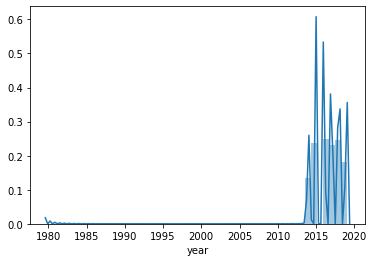

In [143]:
# What does the distribution of years look like?
sns.distplot(df['year']);

In [36]:
# Now that I finally have my data in a datetime format we need to get rid of extra crap
df['year'].max()

2019

In [57]:
df.loc[df['year']<2000]

,911_call_type,type_of_incident,incident_address,division,sector,council_district,date_of_occurrence,year_of_occurrence,month_of_occurrence,day1_of_the_week,time_of_occurrence,day_of_the_year,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,nibrs_crime_category,x_coordinate,y_cordinate,zip_code,month_year,year
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980-06-01,58 - ROUTINE INVESTIGATION,THEFT - PRELIMINARY INVESTIGATION,5420 BENT TREE DR,NORTH CENTRAL,620,D11,1980-06-01,1980,June,Sun,08:00,153,Individual,White,Non-Hispanic or Latino,Female,70,4697,"ELWONGER,RICHARD,S",NaN,NaN,MISCELLANEOUS,2485116.60241,7043508.28321,75248,1980-06,1980
1989-01-27,24 - ABANDONED PROPERTY,FOUND PROPERTY (NO OFFENSE),8709 COMER DR,SOUTHEAST,330,D5,1989-01-27,1989,January,Fri,11:00,27,Individual,White,Non-Hispanic or Latino,Male,67,6689,"HERBERT,REGINA,L",NaN,NaN,NaN,2531273.18914,6956018.49085,75217,1989-01,1989
1989-03-29,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,3459 PEBBLESHORES DR,SOUTH CENTRAL,750,D8,1989-03-29,1989,March,Wed,00:00,88,Individual,Black,Non-Hispanic or Latino,Female,51,8522,"BOWEN,JUSTIN,BOYD",NaN,NaN,MISCELLANEOUS,2502903.88154,6928429.7862,75241,1989-03,1989
1992-01-30,WIC - WALK IN CASE #,LOST PROPERTY (NO OFFENSE),1400 S LAMAR ST,CENTRAL,150,D2,1992-01-30,1992,January,Thu,07:00,30,Individual,Black,Non-Hispanic or Latino,Male,56,6798,"RUFF,ALBERT,W",NaN,NaN,MISCELLANEOUS,2492641.4685,6966516.7986,75215,1992-01,1992
1992-08-01,58 - ROUTINE INVESTIGATION,ASSAULT -OFFENSIVE CONTACT,7310 S WESTMORELAND RD,SOUTHWEST,450,D8,1992-08-01,1992,August,Sat,09:24,214,Individual,Black,Non-Hispanic or Latino,Female,50,7788,"ANDERSON,CHRISTOPHER,CLINTON",NaN,NaN,ASSAULT OFFENSES,2466163.8311,6926329.65189,75237,1992-08,1992
1996-10-01,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,2240 MARBURG ST,SOUTHEAST,340,D7,1996-10-01,1996,October,Tue,08:00,275,Individual,Black,Non-Hispanic or Latino,Female,51,7375,"LUJAN,EDMUNDO,ALEJANDRO",NaN,NaN,MISCELLANEOUS,2503077.60137,6960877.08072,75215,1996-10,1996
1997-01-01,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO # ITEMS < 5,3815 DAWES DR,SOUTHWEST,430,D1,1997-01-01,1997,January,Wed,12:00,1,Individual,Hispanic or Latino,Hispanic or Latino,Female,53,6308,"STEPHENS,RUSSELL,M",NaN,NaN,FRAUD OFFENSES,2465798.74791,6951496.9392,75211,1997-01,1997
1998-01-01,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,3328 LOGANWOOD DR,SOUTHEAST,320,D5,1998-01-01,1998,January,Thu,08:00,1,Individual,Hispanic or Latino,Hispanic or Latino,Male,51,7375,"LUJAN,EDMUNDO,ALEJANDRO",NaN,NaN,MISCELLANEOUS,2524321.57344,6966717.71129,75227,1998-01,1998
1999-03-22,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO # ITEMS < 5,1400 S LAMAR ST,CENTRAL,150,D2,1999-03-22,1999,March,Mon,00:00,81,Individual,Hispanic or Latino,Hispanic or Latino,Female,20,6992,"SANTIESTEBAN,RICHARD",NaN,NaN,NaN,2492641.4685,6966516.7986,75215,1999-03,1999


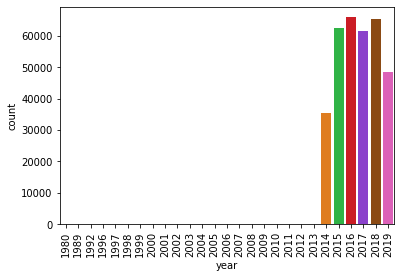

In [38]:
# Since we are already making things pretty- let's do a count plot for year
sns.countplot(df['year'], palette= 'bright')
plt.xticks(rotation = 90);

In [39]:
# Since the majority of our years are between 2015-2019, what do the years below that look like?
off_years = df.loc[df['year']< 2015]

In [40]:
# What does the distribution of these years look like?
off_years['year'].value_counts()

2014    35351
2013      126
2012       43
2011       27
2010       19
2008       15
2009       12
2007       10
2000        8
2004        5
2006        5
2002        3
2001        3
2003        2
1992        2
1989        2
2005        1
1980        1
1999        1
1998        1
1997        1
1996        1
Name: year, dtype: int64

Interesting! We see that we have the most information on crimes that occurred between 2014 - 2019. This will be important later when selecting what final information to keep for our analysis and modeling!

In [144]:
# Creating a month and year column that is not a period
df['mnth_yr'] = df['date_of_occurrence'].apply(lambda x: x.strftime('%B-%Y')) 

In [145]:
#Sanity check
df.head()

,911_call_type,type_of_incident,incident_address,division,sector,council_district,date_of_occurrence,year_of_occurrence,month_of_occurrence,day1_of_the_week,time_of_occurrence,day_of_the_year,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,nibrs_crime_category,x_coordinate,y_cordinate,zip_code,year,mnth_yr
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980-06-01,58 - ROUTINE INVESTIGATION,THEFT - PRELIMINARY INVESTIGATION,5420 BENT TREE DR,NORTH CENTRAL,620,D11,1980-06-01,1980,June,Sun,08:00,153,Individual,White,Non-Hispanic or Latino,Female,70,4697,"ELWONGER,RICHARD,S",NaN,NaN,MISCELLANEOUS,2485116.60241,7043508.28321,75248,1980,June-1980
1989-01-27,24 - ABANDONED PROPERTY,FOUND PROPERTY (NO OFFENSE),8709 COMER DR,SOUTHEAST,330,D5,1989-01-27,1989,January,Fri,11:00,27,Individual,White,Non-Hispanic or Latino,Male,67,6689,"HERBERT,REGINA,L",NaN,NaN,NaN,2531273.18914,6956018.49085,75217,1989,January-1989
1989-03-29,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,3459 PEBBLESHORES DR,SOUTH CENTRAL,750,D8,1989-03-29,1989,March,Wed,00:00,88,Individual,Black,Non-Hispanic or Latino,Female,51,8522,"BOWEN,JUSTIN,BOYD",NaN,NaN,MISCELLANEOUS,2502903.88154,6928429.7862,75241,1989,March-1989
1992-01-30,WIC - WALK IN CASE #,LOST PROPERTY (NO OFFENSE),1400 S LAMAR ST,CENTRAL,150,D2,1992-01-30,1992,January,Thu,07:00,30,Individual,Black,Non-Hispanic or Latino,Male,56,6798,"RUFF,ALBERT,W",NaN,NaN,MISCELLANEOUS,2492641.4685,6966516.7986,75215,1992,January-1992
1992-08-01,58 - ROUTINE INVESTIGATION,ASSAULT -OFFENSIVE CONTACT,7310 S WESTMORELAND RD,SOUTHWEST,450,D8,1992-08-01,1992,August,Sat,09:24,214,Individual,Black,Non-Hispanic or Latino,Female,50,7788,"ANDERSON,CHRISTOPHER,CLINTON",NaN,NaN,ASSAULT OFFENSES,2466163.8311,6926329.65189,75237,1992,August-1992


In [146]:
# It looks like there are several features involving time that they give us already!
# Let's look at month of occurrence first
df['month_of_occurrence'].describe()

count     339633
unique        12
top         July
freq       34029
Name: month_of_occurrence, dtype: object

Cool! We see that there are 12 unique months, good, and that the feature is currently a string. Let's make a new column that is a datetime type so we can have month as a datetime variable.

# 7. Make month into a datetime object!
[Back to working outline](#Working-Outline)


In [149]:
df['date_of_occurrence'].dtype

dtype('<M8[ns]')

In [150]:
df['month']= df['date_of_occurrence'].dt.month
df['month'].head()

date
1980-06-01    6
1989-01-27    1
1989-03-29    3
1992-01-30    1
1992-08-01    8
Name: month, dtype: int64

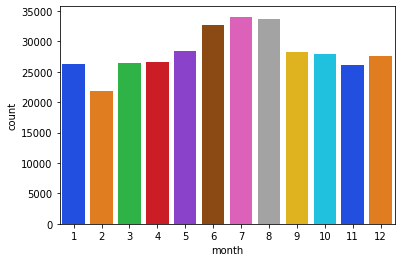

In [152]:
# What does distribution of months look like?
sns.countplot(df['month'], palette= 'bright');

Interesting! Our months with the most frequent number of crimes are July, August, and June. These months, followed by September, are typically the hotest months! We will add the actual temperatures per day later in this project to see if recorded temperatures agree with this!

Since we've created a column that is month and year, let's take a quick peek at what the distribution of those look like!

In [155]:
df['mnth_yr'].dtype

dtype('O')

In [167]:
df['mnth_yr'] = df['mnth_yr'].values.astype('datetime64[M]')

ValueError: Error parsing datetime string "June-1980" at position 0

In [156]:
df['mnth_yr'].dtype

dtype('O')

In [157]:
# Creating a sub-data frame of just counts of crimes per month/year combination
my_count= pd.DataFrame(df['mnth_yr'].value_counts())

In [158]:
my_count.head()

,mnth_yr
July-2018,6303
May-2019,6212
August-2018,6210
March-2019,6202
December-2018,6158


In [159]:
# Resetting index of df
my_count.reset_index(inplace = True)


In [165]:
# Re-naming columns for clarity
my_count  = my_count.rename(columns= {'index':'month_and_year', 'mnth_yr':'count'})

In [166]:
my_count.head()

,month_and_year,count
0,July-2018,6303
1,May-2019,6212
2,August-2018,6210
3,March-2019,6202
4,December-2018,6158


In [162]:
# Sorting this subdf into chronological order
my_count.sort_values(by= my_count['month_and_year'], inplace = True)

KeyError: 0           July-2018
1            May-2019
2         August-2018
3          March-2019
4       December-2018
5           June-2019
6      September-2018
7        October-2018
8         August-2019
9          April-2019
10          July-2019
11      December-2015
12       October-2015
13           May-2016
14          July-2016
15          July-2015
16          June-2016
17       October-2016
18        August-2016
19       January-2019
20         April-2016
21           May-2018
22      November-2018
23       January-2016
24        August-2017
25      December-2016
26          June-2015
27        August-2015
28          June-2018
29     September-2016
30           May-2017
31      November-2016
32          July-2017
33       October-2014
34       January-2017
35         March-2016
36           May-2015
37          June-2017
38      December-2014
39          July-2014
40      November-2015
41       October-2017
42     September-2015
43         April-2017
44     September-2017
45         March-2015
46      November-2014
47         April-2015
48      February-2019
49         April-2018
50      November-2017
51         March-2018
52         March-2017
53      February-2016
54       January-2015
55        August-2014
56       January-2018
57      December-2017
58          June-2014
59      February-2017
60     September-2014
61      February-2015
62      February-2018
63     September-2019
64           May-2014
65         April-2014
66       January-2014
67         March-2014
68      February-2014
69      December-2013
70       October-2013
71      November-2013
72       January-2013
73         April-2013
74        August-2013
75           May-2013
76       January-2012
77       January-2010
78     September-2013
79          June-2013
80          July-2013
81       January-2011
82       October-2012
83         April-2012
84        August-2011
85          June-2012
86     September-2012
87      December-2012
88       January-2009
89     September-2011
90           May-2011
91         March-2013
92       January-2008
93       January-2004
94     September-2007
95         March-2011
96           May-2012
97          July-2011
98      December-2010
99        August-2012
100     February-2012
101         July-2000
102     February-2013
103          May-2006
104    September-2008
105     December-2008
106         June-2009
107         July-2012
108       August-2009
109     November-2011
110        March-2008
111      October-2011
112          May-2000
113     December-2009
114      January-2007
115        April-2010
116      January-2005
117      January-2002
118      January-1997
119      January-2006
120       August-2006
121        March-1999
122         June-1980
123        March-2010
124     November-2012
125          May-2010
126     February-2007
127    September-2010
128         July-2008
129      October-2008
130     February-2011
131        March-2003
132      October-2001
133      October-1996
134        April-2007
135     February-2000
136        March-2012
137       August-1992
138         July-2010
139          May-2002
140         June-2007
141       August-2008
142        March-2000
143      January-1998
144      January-2001
145       August-2007
146     November-2001
147    September-2006
148    September-2009
149      January-1989
150        March-1989
151     February-2008
152         July-2007
153        April-2004
154      January-2003
155         June-2008
156     December-2000
157       August-2010
158      January-1992
159          May-2009
160     November-2008
161         June-2010
162        March-2002
163      January-2000
164      October-2004
Name: month_and_year, dtype: object

In [81]:
# Making a subset for months and years with more than 1,000 crimes reported
keep_months = my_count.loc[my_count['count']>1000]
keep_months

,month and year,count
0,2018-07,6303
1,2019-05,6212
2,2018-08,6210
3,2019-03,6202
4,2018-12,6158
5,2019-06,6103
6,2018-09,6048
7,2018-10,6014
8,2019-08,5908
9,2019-04,5820


In [90]:
# Great info, but sort of hard to look at in non-chronological order! Let's fix that!
keep_months.sort_values(by= ['month and year'], inplace = True)
keep_months.head()


C:\Users\gothv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,month and year,count
58,2014-06,4676
39,2014-07,5222
55,2014-08,4819
60,2014-09,4639
33,2014-10,5333


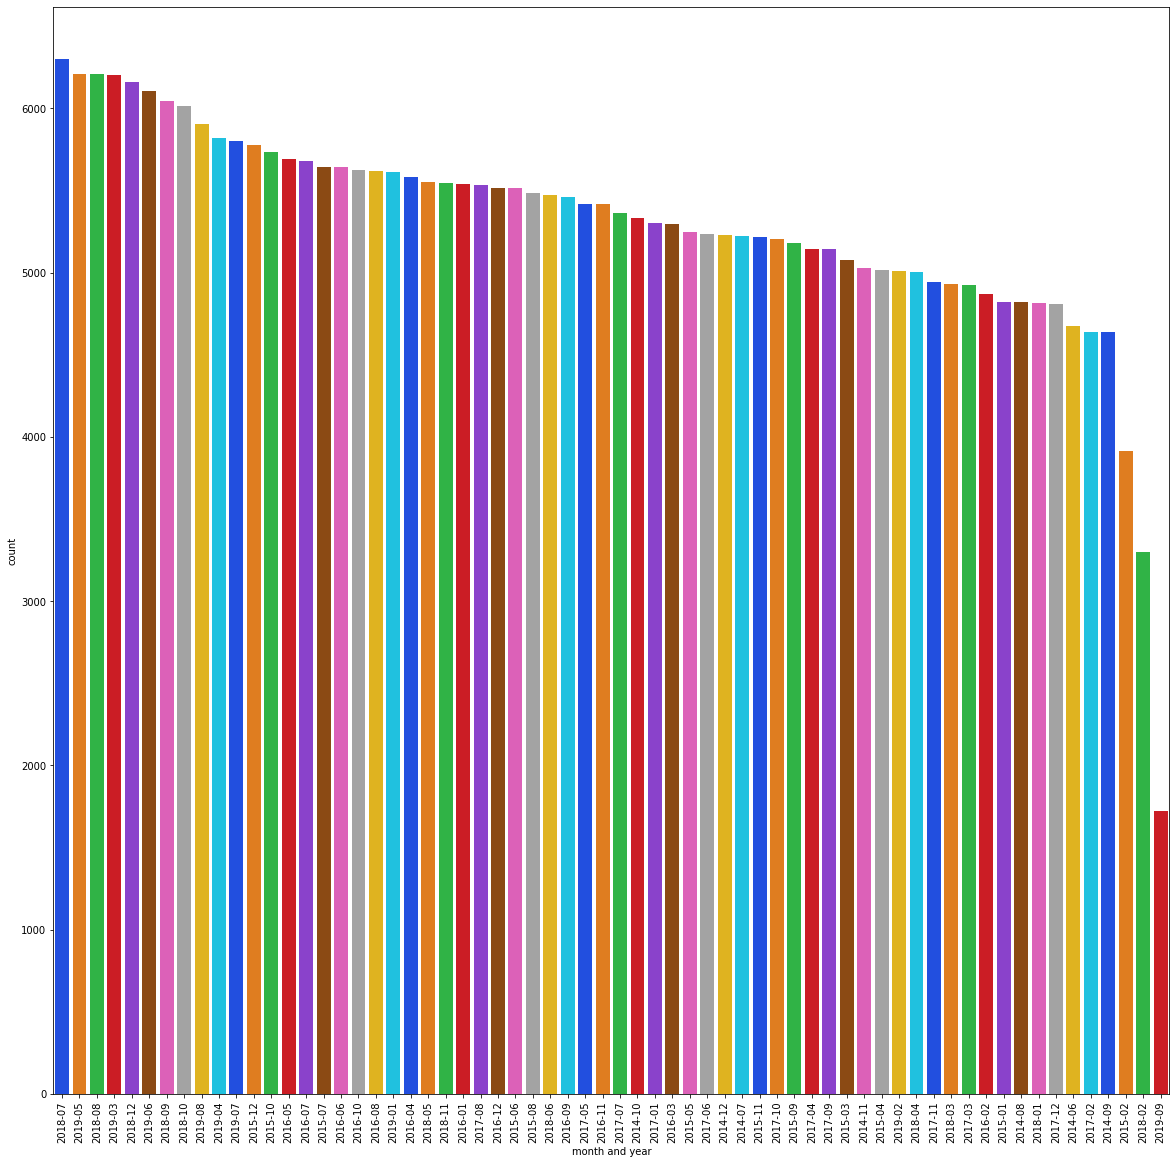

In [89]:
# Creating a  plot to look at the spread of crimes in specific month/year combinations
plt.figure(figsize =(20,20))
sns.barplot(x = keep_months['month and year'], y= keep_months['count'], data= keep_months, palette= 'bright')
plt.xticks(rotation = 90);

## 8. All about victim ages!
[Back to working outline](#Working-Outline)


In [ ]:
sns.distplot(df['victim_age'])

In [ ]:
df['victim_age'].describe()

In [ ]:
df['victim_age'].max()

In [ ]:
df.loc[df['victim_age']== 934]

In [ ]:
df.loc[df['victim_age']>100]

In [ ]:
# This pulls only the info we need - use this to make a subset of just what I want
df.loc[(df['victim_age'] < 122) & (df['year'] > 2014), :].shape